# Silhouette Scores: A Cluster's Quality

A silhouette score for a given point $s$ in a K-Means-defined cluster can be defined as:

$score(s) = \frac{(p - q)}{\max(p, q)}$

Where:
  - $p$ is the average distance between $s$ and each point in the nearest cluster that $s$ isn't in.
  - $q$ is the average distance between $s$ and each point in its own cluster.
 
$score$ will be between -1 and 1.  An average silhouette score close to -1 indicates that you have too many or too few clusters.  A score close to 1 indicates that you've got a good value of $K$.

In [17]:
import numpy
from matplotlib import pyplot
import scikitplot
from sklearn import metrics
from sklearn.cluster import KMeans
import ipywidgets as widgets

In [8]:
data = numpy.loadtxt("data_quality.txt", delimiter=",")

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

## Visualizing Input Data

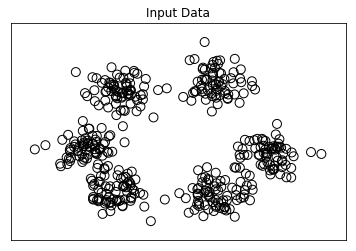

In [9]:
pyplot.figure()
pyplot.scatter(data[:, 0], data[:, 1], color='black', s=80, marker='o', facecolors='none')
pyplot.title("Input Data")
pyplot.xlim(x_min, x_max)
pyplot.ylim(y_min, y_max)
pyplot.xticks(())
pyplot.yticks(())
pyplot.show()

## Trying Out Clusters

In [21]:
scores = []

print("Silhouette Scores:")
for n_clusters in numpy.arange(2, 11):
    # For each value of K between 2 and 10...
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=10, n_jobs=-1)
    kmeans.fit(data)
    
    score = metrics.silhouette_score(data, kmeans.labels_, metric='euclidean', sample_size=len(data))
    scores.append(score)
    print("\tK = {0}\t--> {1:.3f}".format(n_clusters, score))

print()

Silhouette Scores:
	K = 2	--> 0.478
	K = 3	--> 0.547
	K = 4	--> 0.579
	K = 5	--> 0.589
	K = 6	--> 0.610
	K = 7	--> 0.554
	K = 8	--> 0.499
	K = 9	--> 0.456
	K = 10	--> 0.408



In [23]:
def cluster(n_clusters=6):
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=10, n_jobs=-1)
    kmeans.fit(data)
    
    scikitplot.metrics.plot_silhouette(data, kmeans.labels_)

widgets.interactive(
    cluster,
    n_clusters=widgets.IntSlider(value=6, min=2, max=16, continuous_update=False)
)

interactive(children=(IntSlider(value=6, continuous_update=False, description='n_clusters', max=16, min=2), Ou…